In [ ]:
import os
import pandas as pd
#import altair as alt
#from vega_datasets import data
#import pygal
import matplotlib.pyplot as plt
import plotly.express as px
#import numpy as np
import seaborn as sns
%matplotlib inline


In [ ]:
#TOTAL COLORADO GDP BY INDUSTRY
#READING DATA
DetailedGDP = pd.read_csv("../data/cleandata/COGDPDetailed.csv")
DetailedGDP.set_index("Description", inplace=True)
#DetailedGDP.head(10)


DetailedGDP.T.plot.bar(stacked=True, figsize=(12,7), cmap="mako")
plt.suptitle('Colorado Gross Domestic Product by Industry', weight='bold')
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#TOTAL COLORADO GDP BY COUNTY
TotalGDP = pd.read_csv("../data/cleandata/COGDPbyCounties-Totals.csv")
TotalGDP.set_index("Location", inplace=True)
TotalGDP = TotalGDP.transpose()
#TotalGDP.head(10)

TotalGDP.T.plot.bar(stacked=True, figsize=(17,7), cmap="mako")
plt.suptitle('Colorado Gross Domestic Product by County', weight='bold')
plt.ticklabel_format(style='plain', axis='y')

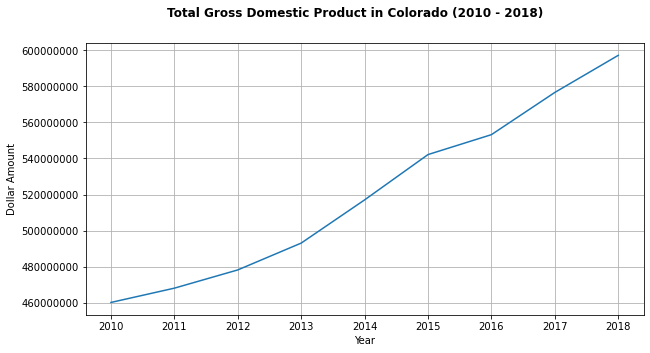

In [103]:
#Growth percentage by Industry

GrowthIndustry = pd.read_csv("../data/cleandata/COGDPDetailed.csv")

GrowthIndustry['Total'] = GrowthIndustry.sum(axis=1)
GrowthIndustry = GrowthIndustry[['Description', 'Total']]

#GrowthIndustry.head(10)

plt.figure(figsize=(10,5))
plt.plot(GrowthIndustry['Description'], GrowthIndustry['Total'])

plt.suptitle('Total Gross Domestic Product in Colorado (2010 - 2018)', weight='bold')
plt.xlabel('Year')
plt.ylabel('Dollar Amount')
plt.ticklabel_format(style='plain', axis='y')

plt.grid()
plt.show()
plt.close()

In [ ]:
Arrests = pd.read_csv("../data/cleandata/FinalizedCrimeStats.csv")
#Arrests = Arrests.drop(columns=['Offense Type'])
#Arrests = Arrests.groupby(['Year', 'County', 'latitude', 'longtitude']).sum()
#Arrests['Total Crime'] = Arrests['Number of Arrests'] + Arrests['Number of Offenses']
#Arrests.to_csv("../data/cleandata/FinalizedCrimeStats.csv")

Arrests.head(3)

In [ ]:
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

ArrestsPlot = px.scatter_mapbox(Arrests, 
lat="latitude", lon="longtitude", 
size="Total Crime", color="Year", 
mapbox_style="carto-positron",
zoom=5,
hover_name="County",
title="Reported Offenses and Arrests Related to Marijuana by County",
)

#ArrestsPlot.layout.coloraxis.showscale = False
ArrestsPlot.show()

In [ ]:
##PLOT WITH SLIDER

mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

ArrestsPlotSlider = px.scatter_mapbox(Arrests, 
lat="latitude", lon="longtitude", 
size="Total Crime", color="Year", 
mapbox_style="carto-positron",
zoom=5,
hover_name="County",
title="Reported Offenses and Arrests Related to Marijuana by County",
animation_frame="Year", animation_group="County"
)

#ArrestsPlot.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
#rrestsPlot.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 200
ArrestsPlotSlider.layout.coloraxis.showscale = False
#ArrestsPlot.layout.sliders[0].pad.t = 10
#ArrestsPlot.layout.updatemenus[0].pad.t= 50

#ArrestsPlot.layout.coloraxis.showscale = False
ArrestsPlotSlider.show()